In [7]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:18pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:18pt;padding:5px;}
table.dataframe{font-size:18px;}
</style>
"""))

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [133]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 loss와 acc 시각화
# quiz에서는 scale조정, train_test_split 등을 추가

In [7]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [8]:
print('타켓 :', data[1,0])
#print('이미지(28*28을 1차원으로) :', data[0, 1:].reshape(28,28))

타켓 : 0.0


In [9]:
for row in data[1, 1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

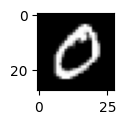

In [10]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [11]:
# %pip install opencv-contrib-python

In [12]:
# %pip install opencv-python

In [14]:
# 칼라사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('d:/sample.jpg', cv2.IMREAD_GRAYSCALE) # 흑백포맷으로 읽기
print(image_gray.shape)
print(type(image_gray))

(408, 612)
<class 'numpy.ndarray'>


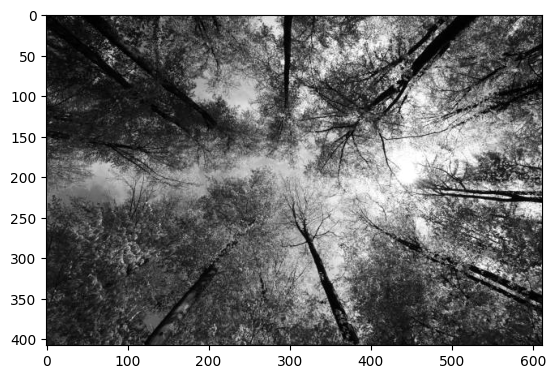

In [17]:
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [83]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [24]:
print(y_train[0])
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

5
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0

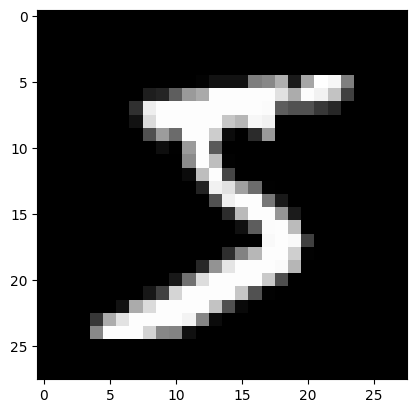

In [27]:
plt.imshow(X_train[0], cmap='gray')

In [28]:
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [31]:
# 학습셋(5만개:fit용), 검증셋(만:fit용), 테스트셋(만:평가용)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [80]:
# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [85]:
# 훈련셋5만개 -> 700개, 테스트셋1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
train_X.shape, y_train.shape, val_X.shape, y_val.shape

((700, 784), (700,), (300, 784), (300,))

In [91]:
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[6 7]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


# 2. 모델 구성

In [102]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [103]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델 학습

In [104]:
%%time
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 0s 22ms/step - loss: 2.3207 - accuracy: 0.1257 - val_loss: 2.2977 - val_accuracy: 0.1633
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 2.2906 - accuracy: 0.1729 - val_loss: 2.2798 - val_accuracy: 0.1833
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2688 - accuracy: 0.1943 - val_loss: 2.2482 - val_accuracy: 0.2033
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 2.2391 - accuracy: 0.2057 - val_loss: 2.2176 - val_accuracy: 0.2200
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 2.2060 - accuracy: 0.2086 - val_loss: 2.1862 - val_accuracy: 0.2067
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 2.1734 - accuracy: 0.2100 - val_loss: 2.1575 - val_accuracy: 0.2433
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1417 - accuracy: 0.2171 - val_loss: 2.1320 - val_accuracy: 0.2433
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 1.6118 - accuracy: 0.4200 - val_loss: 1.7217 - val_accuracy: 0.3967
Epoch 60/500
7/7 [==============================] - 0s 5ms/step - loss: 1.6066 - accuracy: 0.4157 - val_loss: 1.7187 - val_accuracy: 0.4000
Epoch 61/500
7/7 [==============================] - 0s 5ms/step - loss: 1.6011 - accuracy: 0.4229 - val_loss: 1.7139 - val_accuracy: 0.4033
Epoch 62/500
7/7 [==============================] - 0s 5ms/step - loss: 1.5955 - accuracy: 0.4243 - val_loss: 1.7106 - val_accuracy: 0.4033
Epoch 63/500
7/7 [==============================] - 0s 3ms/step - loss: 1.5901 - accuracy: 0.4257 - val_loss: 1.7057 - val_accuracy: 0.4100
Epoch 64/500
7/7 [==============================] - 0s 5ms/step - loss: 1.5853 - accuracy: 0.4329 - val_loss: 1.7018 - val_accuracy: 0.4100
Epoch 65/500
7/7 [==============================] - 0s 5ms/step - loss: 1.5804 - accuracy: 0.4271 - val_loss: 1.6993 - val_accuracy: 0.4100
Epoch 66/500
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 1.3757 - accuracy: 0.5400 - val_loss: 1.5516 - val_accuracy: 0.4533
Epoch 118/500
7/7 [==============================] - 0s 5ms/step - loss: 1.3723 - accuracy: 0.5400 - val_loss: 1.5484 - val_accuracy: 0.4667
Epoch 119/500
7/7 [==============================] - 0s 5ms/step - loss: 1.3687 - accuracy: 0.5371 - val_loss: 1.5476 - val_accuracy: 0.4600
Epoch 120/500
7/7 [==============================] - 0s 5ms/step - loss: 1.3657 - accuracy: 0.5386 - val_loss: 1.5461 - val_accuracy: 0.4567
Epoch 121/500
7/7 [==============================] - 0s 5ms/step - loss: 1.3623 - accuracy: 0.5429 - val_loss: 1.5435 - val_accuracy: 0.4667
Epoch 122/500
7/7 [==============================] - 0s 5ms/step - loss: 1.3595 - accuracy: 0.5414 - val_loss: 1.5420 - val_accuracy: 0.4567
Epoch 123/500
7/7 [==============================] - 0s 5ms/step - loss: 1.3565 - accuracy: 0.5486 - val_loss: 1.5390 - val_accuracy: 0.4633
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 1.1860 - accuracy: 0.6071 - val_loss: 1.4447 - val_accuracy: 0.5000
Epoch 176/500
7/7 [==============================] - 0s 5ms/step - loss: 1.1825 - accuracy: 0.6114 - val_loss: 1.4414 - val_accuracy: 0.4933
Epoch 177/500
7/7 [==============================] - 0s 5ms/step - loss: 1.1799 - accuracy: 0.6100 - val_loss: 1.4413 - val_accuracy: 0.4933
Epoch 178/500
7/7 [==============================] - 0s 5ms/step - loss: 1.1774 - accuracy: 0.6114 - val_loss: 1.4390 - val_accuracy: 0.4933
Epoch 179/500
7/7 [==============================] - 0s 5ms/step - loss: 1.1742 - accuracy: 0.6129 - val_loss: 1.4402 - val_accuracy: 0.5033
Epoch 180/500
7/7 [==============================] - 0s 5ms/step - loss: 1.1721 - accuracy: 0.6157 - val_loss: 1.4378 - val_accuracy: 0.5000
Epoch 181/500
7/7 [==============================] - 0s 5ms/step - loss: 1.1696 - accuracy: 0.6071 - val_loss: 1.4361 - val_accuracy: 0.4933
Epoch 182/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 1.0665 - accuracy: 0.6457 - val_loss: 1.4015 - val_accuracy: 0.5100
Epoch 234/500
7/7 [==============================] - 0s 5ms/step - loss: 1.0645 - accuracy: 0.6471 - val_loss: 1.4029 - val_accuracy: 0.5100
Epoch 235/500
7/7 [==============================] - 0s 5ms/step - loss: 1.0632 - accuracy: 0.6471 - val_loss: 1.4019 - val_accuracy: 0.5100
Epoch 236/500
7/7 [==============================] - 0s 5ms/step - loss: 1.0622 - accuracy: 0.6500 - val_loss: 1.3997 - val_accuracy: 0.5133
Epoch 237/500
7/7 [==============================] - 0s 5ms/step - loss: 1.0602 - accuracy: 0.6486 - val_loss: 1.4002 - val_accuracy: 0.5000
Epoch 238/500
7/7 [==============================] - 0s 5ms/step - loss: 1.0589 - accuracy: 0.6529 - val_loss: 1.3991 - val_accuracy: 0.5100
Epoch 239/500
7/7 [==============================] - 0s 5ms/step - loss: 1.0569 - accuracy: 0.6471 - val_loss: 1.4001 - val_accuracy: 0.5100
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 3ms/step - loss: 0.9830 - accuracy: 0.6729 - val_loss: 1.3930 - val_accuracy: 0.5100
Epoch 292/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9815 - accuracy: 0.6714 - val_loss: 1.3948 - val_accuracy: 0.5133
Epoch 293/500
7/7 [==============================] - 0s 5ms/step - loss: 0.9804 - accuracy: 0.6757 - val_loss: 1.3938 - val_accuracy: 0.5133
Epoch 294/500
7/7 [==============================] - 0s 5ms/step - loss: 0.9787 - accuracy: 0.6743 - val_loss: 1.3928 - val_accuracy: 0.5100
Epoch 295/500
7/7 [==============================] - 0s 5ms/step - loss: 0.9790 - accuracy: 0.6743 - val_loss: 1.3915 - val_accuracy: 0.5067
Epoch 296/500
7/7 [==============================] - 0s 5ms/step - loss: 0.9771 - accuracy: 0.6686 - val_loss: 1.3935 - val_accuracy: 0.5133
Epoch 297/500
7/7 [==============================] - 0s 5ms/step - loss: 0.9745 - accuracy: 0.6786 - val_loss: 1.3937 - val_accuracy: 0.5167
Epoch 298/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.9148 - accuracy: 0.6943 - val_loss: 1.4075 - val_accuracy: 0.4967
Epoch 350/500
7/7 [==============================] - 0s 4ms/step - loss: 0.9131 - accuracy: 0.6986 - val_loss: 1.4051 - val_accuracy: 0.5000
Epoch 351/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9116 - accuracy: 0.6971 - val_loss: 1.4076 - val_accuracy: 0.4933
Epoch 352/500
7/7 [==============================] - 0s 5ms/step - loss: 0.9101 - accuracy: 0.6971 - val_loss: 1.4084 - val_accuracy: 0.4933
Epoch 353/500
7/7 [==============================] - 0s 5ms/step - loss: 0.9089 - accuracy: 0.6957 - val_loss: 1.4065 - val_accuracy: 0.4967
Epoch 354/500
7/7 [==============================] - 0s 5ms/step - loss: 0.9081 - accuracy: 0.6971 - val_loss: 1.4073 - val_accuracy: 0.4933
Epoch 355/500
7/7 [==============================] - 0s 5ms/step - loss: 0.9069 - accuracy: 0.6986 - val_loss: 1.4074 - val_accuracy: 0.4933
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.8552 - accuracy: 0.7114 - val_loss: 1.4294 - val_accuracy: 0.4900
Epoch 408/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8547 - accuracy: 0.7114 - val_loss: 1.4313 - val_accuracy: 0.4867
Epoch 409/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8533 - accuracy: 0.7143 - val_loss: 1.4313 - val_accuracy: 0.4967
Epoch 410/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8524 - accuracy: 0.7157 - val_loss: 1.4313 - val_accuracy: 0.4867
Epoch 411/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8514 - accuracy: 0.7157 - val_loss: 1.4317 - val_accuracy: 0.4967
Epoch 412/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8511 - accuracy: 0.7143 - val_loss: 1.4320 - val_accuracy: 0.4933
Epoch 413/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8502 - accuracy: 0.7143 - val_loss: 1.4339 - val_accuracy: 0.4900
Epoch 414/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.8074 - accuracy: 0.7300 - val_loss: 1.4608 - val_accuracy: 0.5000
Epoch 466/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8068 - accuracy: 0.7314 - val_loss: 1.4612 - val_accuracy: 0.4967
Epoch 467/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8067 - accuracy: 0.7271 - val_loss: 1.4661 - val_accuracy: 0.5000
Epoch 468/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8049 - accuracy: 0.7300 - val_loss: 1.4654 - val_accuracy: 0.4933
Epoch 469/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8043 - accuracy: 0.7300 - val_loss: 1.4660 - val_accuracy: 0.4967
Epoch 470/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8035 - accuracy: 0.7329 - val_loss: 1.4678 - val_accuracy: 0.4967
Epoch 471/500
7/7 [==============================] - 0s 5ms/step - loss: 0.8030 - accuracy: 0.7314 - val_loss: 1.4675 - val_accuracy: 0.5000
Epoch 472/500
7/7 [========

# 5. 모델 평가하기

In [96]:
# 학습 과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

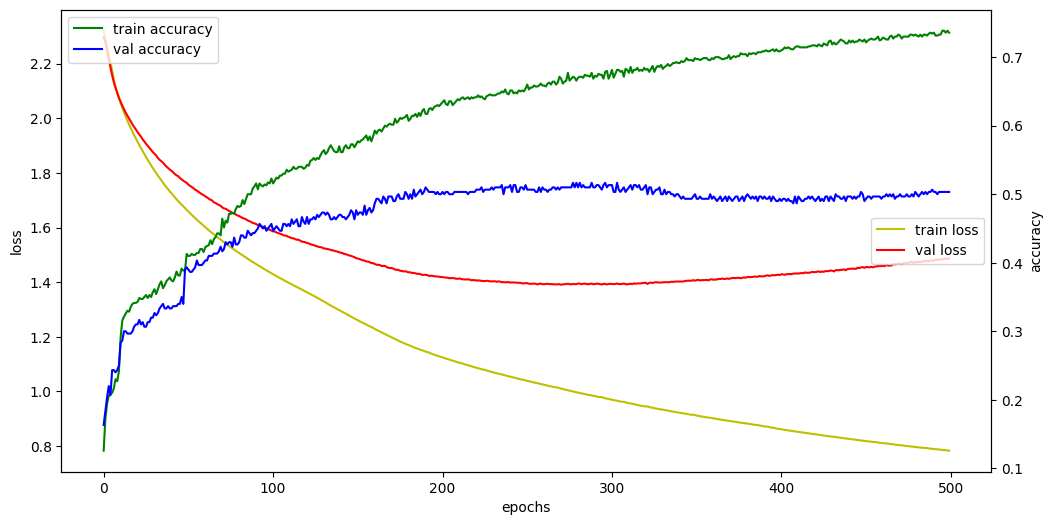

In [105]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [106]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 1.9129513502120972
accuracy : 0.45649999380111694


# ※ 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data추가, dropout, 활성화함수relu계열, tanh)
- epoch 조정
- optimizer 변경

Epoch 1/50
500/500 [==============================] - 11s 21ms/step - loss: 0.2729 - accuracy: 0.9161 - val_loss: 0.1065 - val_accuracy: 0.9695
Epoch 2/50
500/500 [==============================] - 10s 20ms/step - loss: 0.1251 - accuracy: 0.9629 - val_loss: 0.0889 - val_accuracy: 0.9733
Epoch 3/50
500/500 [==============================] - 10s 20ms/step - loss: 0.0954 - accuracy: 0.9694 - val_loss: 0.0912 - val_accuracy: 0.9739
Epoch 4/50
500/500 [==============================] - 10s 20ms/step - loss: 0.0799 - accuracy: 0.9751 - val_loss: 0.0779 - val_accuracy: 0.9793
Epoch 5/50
500/500 [==============================] - 10s 21ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.0782 - val_accuracy: 0.9773
Epoch 6/50
500/500 [==============================] - 10s 20ms/step - loss: 0.0589 - accuracy: 0.9810 - val_loss: 0.0767 - val_accuracy: 0.9796
Epoch 7/50
500/500 [==============================] - 10s 20ms/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0845 - val_accuracy:

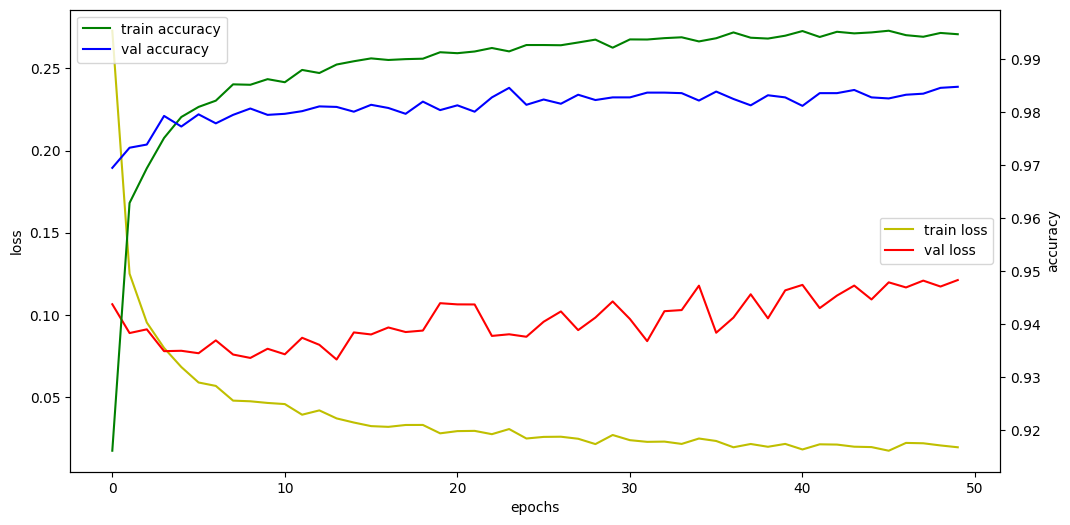

CPU times: total: 24min 16s
Wall time: 8min 42s


In [144]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
# train_idx = np.random.choice(50000, 700)
# val_idx  = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# y_train = y_train[train_idx]
# val_X   = val_X[val_idx]
# y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu')) # tanh, relu, elu, gelu
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(units=256)) #  activation='leakyrelu'사용불가
from tensorflow.keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.01)) 
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [146]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 0.11511684209108353
accuracy : 0.9854000210762024


In [153]:
# 실제값
test_Y.argmax(axis=1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [156]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [157]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,970,1,2,2,0,2,1,0,1,1
1,0,1124,1,1,1,2,2,1,3,0
2,0,0,1014,4,1,0,2,7,4,0
3,0,0,1,995,0,6,0,4,3,1
4,1,1,2,0,964,0,4,2,1,7
5,2,0,0,4,1,883,1,0,1,0
6,2,2,0,1,4,2,944,0,3,0
7,1,0,6,0,0,0,0,1017,2,2
8,0,1,1,7,2,2,1,4,953,3


In [158]:
confusion_matrix(y_test, yhat)

array([[ 970,    1,    2,    2,    0,    2,    1,    0,    1,    1],
       [   0, 1124,    1,    1,    1,    2,    2,    1,    3,    0],
       [   0,    0, 1014,    4,    1,    0,    2,    7,    4,    0],
       [   0,    0,    1,  995,    0,    6,    0,    4,    3,    1],
       [   1,    1,    2,    0,  964,    0,    4,    2,    1,    7],
       [   2,    0,    0,    4,    1,  883,    1,    0,    1,    0],
       [   2,    2,    0,    1,    4,    2,  944,    0,    3,    0],
       [   1,    0,    6,    0,    0,    0,    0, 1017,    2,    2],
       [   0,    1,    1,    7,    2,    2,    1,    4,  953,    3],
       [   0,    2,    0,    4,    6,    4,    0,    3,    0,  990]],
      dtype=int64)

In [161]:
# 틀린 갯수:
10000- 10000*loss_and_metrics[1]

145.99978923797607

In [162]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('틀린 갯수 :', cnt)

틀린 갯수 : 146


In [164]:
# 모델 저장
model.save('model/08_mnist.h5')

# ※ 콜백함수1 : 로그 출력

In [165]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [ ]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있으니, 특정 에포크마다 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}) : # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1  # epoch마다 self.epoch값을 1씩 증가
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                  format(self.epoch, 
                        logs.get('loss'),
                        logs.get('accuracy', '-'),
                        logs.get('val_loss', '-'),
                        logs.get('val_accuracy', '-')
                  )
            )
        
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
customHistory = CustomHistory()
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수

epoch:10, loss:2.0927023887634277, acc:0.2314285784959793, val_loss:2.1135430335998535, val_acc:0.2133333384990692
epoch:20, loss:1.9231078624725342, acc:0.2871428430080414, val_loss:1.9823951721191406, val_acc:0.2666666805744171
epoch:30, loss:1.8093117475509644, acc:0.34857141971588135, val_loss:1.8969122171401978, val_acc:0.30000001192092896
epoch:40, loss:1.7226927280426025, acc:0.3642857074737549, val_loss:1.8340831995010376, val_acc:0.3033333420753479
